<span style="color:#51a2d6; font-size:24px; font-weight:700"> Hierarchical clustering

Now we will consider the situations when we do not know in advance how many clusters we want. 
Once the algorithm is run, we end up with a tree-like visual representation of the observations, 
called a dendrogram, that allows us to view at once the clusterings 
obtained for each possible number of clusters, from 1 to n.

K-means clustering requires us to pre-specify the number of clusters K (something which 
is not a requirement for Hierarchical clustering). 
Also, hierarchical clustering has an added advantage: 
it results in an attractive tree-based representation of the observations at 
different scales of clustering, called a _dendrogram_. 

Bottom-up or agglomerative clustering is the most common type of hierarchical clustering, 
and refers to the fact that a dendrogram is built starting from the leaves and combining clusters up to the trunk.

In the images shown below, each leaf of the dendrogram represents an observation. 
As we move up the tree, some leaves begin to fuse into branches. 
These correspond to observations that are similar to each other. 
For any two observations, we can look for the point in the tree where branches 
containing those two observations are first fused. 
The height of this fusion, as measured on the vertical axis, indicates how different the two observations are. 
Thus, observations that fuse at the very bottom of the tree are quite similar to each other, 
whereas observations that fuse close to the top of the tree will tend to be quite different. 

<img src="../images/dendogram.JPG">
$$ Figure\  1$$

The dashed line represents the cut. 
The left image is not cut which gives us one cluster for all observations. 
The middle image is cut in such a way that two clusters are generated. 
The cut on the right image generates 3 clusters. 

<span style="color:#ce7721; font-size:18px; font-weight:700">  Interpreting a dendrogram

Consider the simple dendrogram below...

<img src="../images/simple_dendogram.PNG" height="1200" width="600">
$$ Figure\  2$$

It is obtained from hierarchically clustering nine observations. 
One can see that observations 5 and 7 are quite similar to each other, 
since they fuse at the lowest point on the dendrogram. 
Observations 1 and 6 are also quite similar to each other. 
However, observation 9 is no more similar to observation 2 than it is to observations 8, 5, and 7, even though observations 9 and 2 are close together in terms of horizontal distance. This is because
observations 2, 8, 5, and 7 all fuse with observation 9 at the same height, approximately
1.8.  This can be seen from the right-hand panel of the above figure. Conclusions about the proximity of two observations can be drawn only based on the height where branches containing those two observations first are fused. We cannot use the proximity of two observations along the horizontal axis as a criteria of their similarity.

To put it mathematically, there are $2^{n−1}$ possible reorderings of the dendrogram, 
where n is the number of leaves. 
This is because at each of the $n − 1$ points where fusions occur, 
the positions of the two fused branches could be swapped without affecting the meaning of the dendrogram.
Therefore, we cannot draw conclusions about the similarity of two observations based 
on their proximity along the horizontal axis. 
Rather, we draw conclusions about the similarity of two observations based on the location on the vertical axis where branches containing those two observations first are fused.

Now, we can move on to the issue of identifying clusters on the basis of a dendrogram. 
In order to do this, we make a horizontal cut across the dendrogram, 
as shown in the center and the right-hand panels of Figure (1). 
The height of the cut to the dendrogram serves the same role as the K in K-means clustering: 
it controls the number of clusters obtained. 
A very attractive aspect of hierarchical clustering: 
one single dendrogram can be used to obtain any number of clusters.
More specifically, a user can qualitatively assess the effects of different choices of $K$ after
the algorithm has run to completion.




<span style="color:#1576b2; font-size:20px; font-weight:700"> Hierarchical Clustering Algorithm

A dissimilarity measure, most often Euclidean distance, is used between each pair of observations. 
Starting out at the bottom of the dendrogram, each of the **n** observations is treated as its own cluster. 
The two clusters that are most similar to each other are then fused so that there are now **n−1** clusters. 
Next, the two clusters that are most similar to each other are fused again, 
so that there are now $n−2$ clusters. 
The algorithm proceeds in this fashion until all of the observations belong to one single cluster, 
and the dendrogram is complete.

The concept of dissimilarity between a pair of observations needs to be extended to a pair of groups of observations. 
This extension is achieved by developing the notion of **linkage**, 
which defines the dissimilarity between two groups of observations. 
The four most common types of linkage are complete, average, single, and centroid. 


<table>
    <tr>
        <th>Linkage</th>
        <th style="text-align:center">Linkage Description</th>
    </tr>
    <tr>
        <td><b>Complete</b></td>
        <td style="text-align:center">Maximal intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the largest of these dissimilarities.</td>
    </tr>
    <tr>
        <td><b>Single</b></td>
        <td style="text-align:center">Minimal intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the smallest of these dissimilarities. Single linkage can result in extended, trailing clusters in which single observations are fused one-at-a-time.</td>
    </tr>
    <tr>
        <td><b>Average</b></td>
        <td style="text-align:center">Mean intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the average of these dissimilarities.</td>
    </tr>
    <tr>
        <td><b>Centroid</b></td>
        <td style="text-align:center">Dissimilarity between the centroid for cluster A (a mean vector of length p) and the centroid for cluster B. Centroid linkage can result in undesirable inversions.</td>
    </tr>
</table>

-----
<span style="color:#1576b2; font-size:16px; font-weight:700"> Algorithm : Hierarchical Clustering

-------

1. Begin with $n$ observations and a measure (such as Euclidean distance) of all the ${n}\choose{2}$ = $n(n−1)/2$ pairwise dissimilarities. Treat each observation as its own cluster.
2. For $i = n, n − 1, . . . , 2$:

    a. Examine all pairwise inter-cluster dissimilarities among the $i$ clusters and identify the pair of clusters that are least dissimilar (that is, most similar). Fuse these two clusters. The dissimilarity between these two clusters indicates the height in the dendrogram at which the fusion should be placed.
    
    b. Compute the new pairwise inter-cluster dissimilarities among the $i − 1$ remaining clusters.
-----

Average and complete linkage are generally preferred over single linkage, as they tend to yield more balanced dendrograms. 

<span style="color:#1576b2; font-size:18px; font-weight:700"> Choice of Dissimilarity Measure

We have used Euclidean distance as the dissimilarity measure till now. 
But sometimes other dissimilarity measures might be preferred. 
For example, correlation-based distance considers two observations to be similar if their features are highly correlated, 
even though the observed values may be far apart in terms of Euclidean distance.

Normally correlation is computed between variables, 
but here it is computed between the observation profiles for each pair of observations. 
The choice of dissimilarity measure is very important as it has a strong effect on the resulting dendrogram. 
In general, attention should be paid to the type of data being clustered and the scientific question at hand.


**Example: ** 
Consider an online retailer interested in clustering shoppers based on their past shopping histories. 
The goal is to identify subgroups of similar shoppers, 
so that shoppers within each subgroup can be shown items and advertisements that are 
particularly likely to interest them. 
Suppose the data takes the form of a matrix where the rows are the shoppers and the 
columns are the items available for purchase; 
the elements of the data matrix indicate the number of times a given shopper has purchased a given item 
(i.e. a 0 if the shopper has never purchased this item, a 1 if the shopper has purchased it once, etc.).

What type of dissimilarity measure should be used to cluster the shoppers? 
If Euclidean distance is used, then shoppers who have bought very few items overall 
(i.e. infrequent users of the online shopping site) will be clustered together. 
This may not be desirable. 
On the other hand, if correlation-based distance is used, then shoppers with similar preferences 
(e.g. shoppers who have bought items A and B but never items C or D) will be clustered together, 
even if some shoppers with these preferences are higher-volume shoppers than others. 
Therefore, for this application, correlation-based distance may be a better choice.


<span style="color:#1576b2; font-size:16px; font-weight:700"> Standardizing data</span>


In addition to carefully selecting the dissimilarity measure used, 
one must also consider whether or not the variables should be scaled to have a standard deviation 
of one (1.0) before the dissimilarity between the observations is computed. 
If the variables are scaled to have standard deviation one before the inter-observation dissimilarities are computed, 
then each variable will in effect be given equal importance in the hierarchical clustering performed.

We might also want to scale the variables to have standard deviation one if they are measured on different scales; 
otherwise, the choice of units (e.g. centimeters versus kilometers) for a particular 
variable will greatly affect the dissimilarity measure obtained.

#### Things to consider when performing Clustering

1. Should the observations or features first be standardized?
2. In the case of hierarchical clustering:
    * What dissimilarity measure should be used?
    * What type of linkage should be used?
    * Where should we cut the dendrogram in order to obtain clusters?
3. In the case of K-means clustering, how many clusters should we look for in the data?

<span style="color:#1576b2; font-size:16px; font-weight:700; font-style:italic"> Example Clustering</span>


First we will generate some random toy data to perform hierarchical clustering.

In [1]:
# Set the seed to reproduce the results
set.seed(4)

# Generate a random normal distribution of 100 values. Generate a matrix out of this normal distribution.
x = matrix(rnorm(50 * 2), ncol = 2)

# Add 3 to rows 1 to 25 in first column of the matrix
x[1:25, 1] = x[1:25, 1] + 3

# Subtract 4 from rows 1 to 25 in second column of the matrix
x[1:25, 2] = x[1:25, 2] - 4

x

3.21675486,-4.66374314
2.45750743,-4.62372649
3.89114465,-4.07963243
3.59598058,-3.56437524
4.63561800,-2.02909903
3.68927544,-4.59675867
1.71875337,-4.55250721
2.78685548,-3.30403337
4.89653987,-4.15566396
4.77686321,-2.65110180
3.56660450,-5.06852307


----

The `hclust()` function is used to implement hierarchical clustering in R. 
We are going to create matrix $x$, similar to K-Means lab, 
and use that data to plot the hierarchical clustering dendrogram using 
complete, single, and average linkage clustering with Euclidean distance as the dissimilarity measure. 



Let's begin by clustering observations using complete linkage. 
Use `dist()` function to compute the 50 × 50 inter-observation Euclidean distance matrix...

In [2]:
hc.complete = hclust(dist(x), method="complete")

We perform hierarchical clustering with average and single linkage...

In [3]:
hc.average = hclust(dist(x), method ="average")
hc.single = hclust(dist(x), method ="single")

The we can plot the dendrograms obtained using the `plot()` function.
The numbers at the bottom of the plot identify each observation...

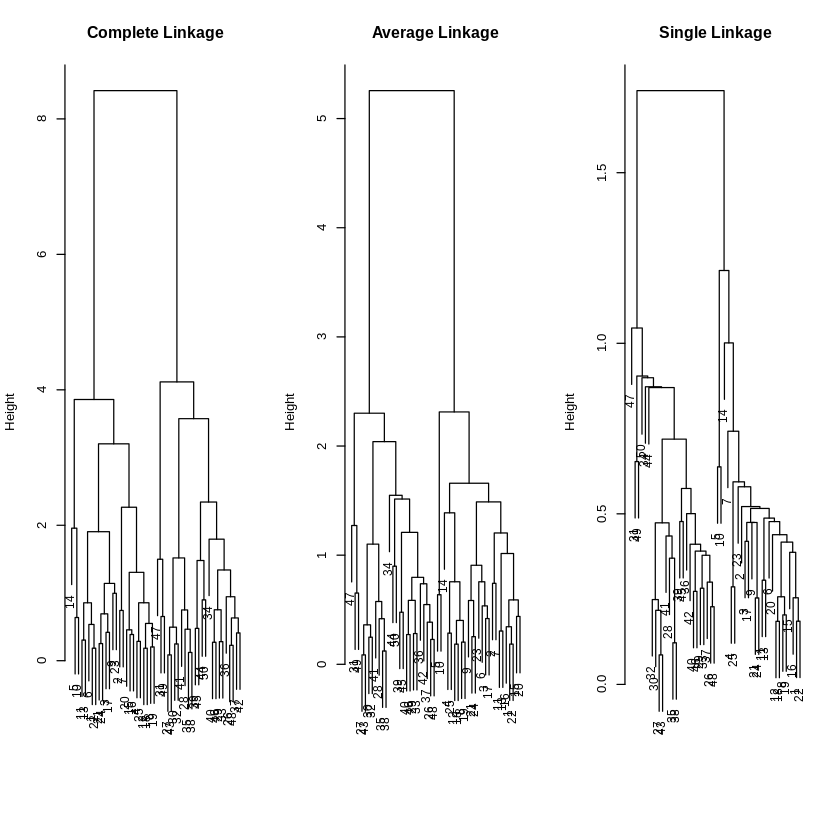

In [4]:
# Arrange 3 plots in a row
par(mfrow = c(1,3))

# Plot all the 3 dendrograms generated using different linkage schemes.
plot(hc.complete, main = "Complete Linkage", xlab = "", sub = "", cex = .9)
plot(hc.average, main = "Average Linkage", xlab = "", sub = "", cex = .9)
plot(hc.single, main = "Single Linkage", xlab = "", sub = "", cex = .9)

To determine the cluster labels for each observation associated with a given number of cuts of the dendrogram, 
we can use the `cutree()` function as shown below.  Here, we are specifiying that the dendrogram has 2 cuts.

In [5]:
cutree(hc.complete, 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

In [6]:
cutree(hc.average, 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

In [7]:
cutree(hc.single, 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

**Note:**
In the cells above, we have chosen a $k=2$ number of clusters.
This was based on our qualitative assessment of the dendograms.
What happens if we make a different choice?

**Your Turn**:

In [8]:
k <- 6   # Keep changing me... rerun
cutree(hc.single, k)  # Also change from complete, average, and single

[1] 1 1 1 1 2 1 1 1 1 2 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 5 4 4 4 4 4 4 4
[39] 4 4 4 4 4 4 4 4 6 4 5 4

---- 
To scale the variables before performing hierarchical clustering of the observations, we use the `scale()` function.

In [9]:
help(scale)

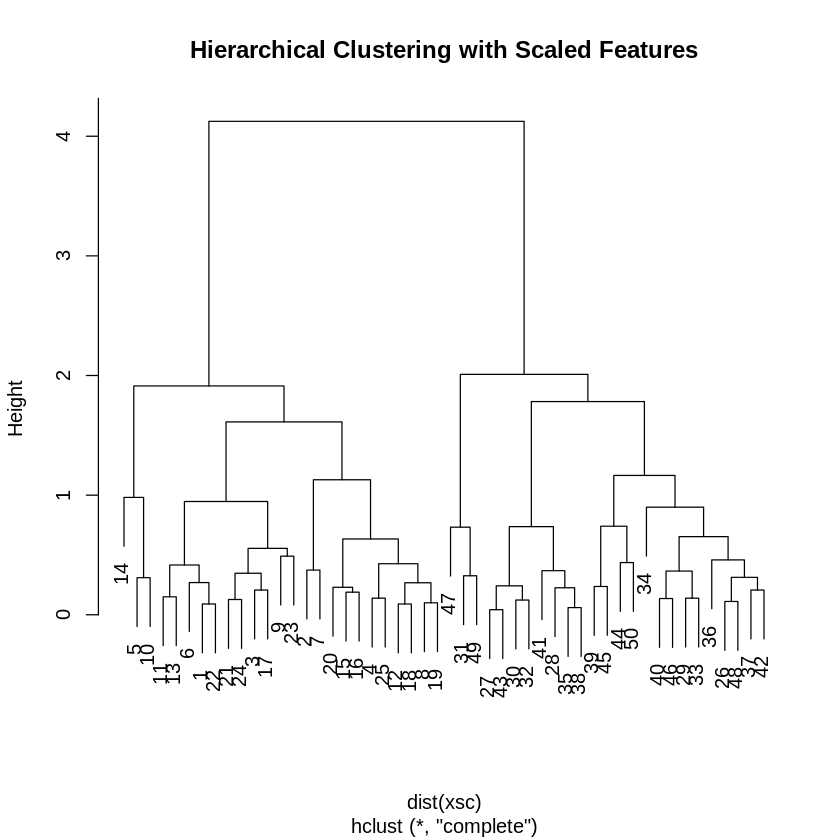

In [10]:
xsc = scale(x)
plot(hclust(dist(xsc), method = "complete"), main = "Hierarchical Clustering with Scaled Features")

--- 

#### Changing distance metric

Correlation-based distance can be computed using the `as.dist()` function, 
which converts an arbitrary square symmetric matrix into a form that the `hclust()` 
function recognizes as a distance matrix. 
However, this only makes sense for data with at least three features since the absolute 
correlation between any two observations with measurements on two features is always 1. 
Hence, we will cluster a three-dimensional data set.

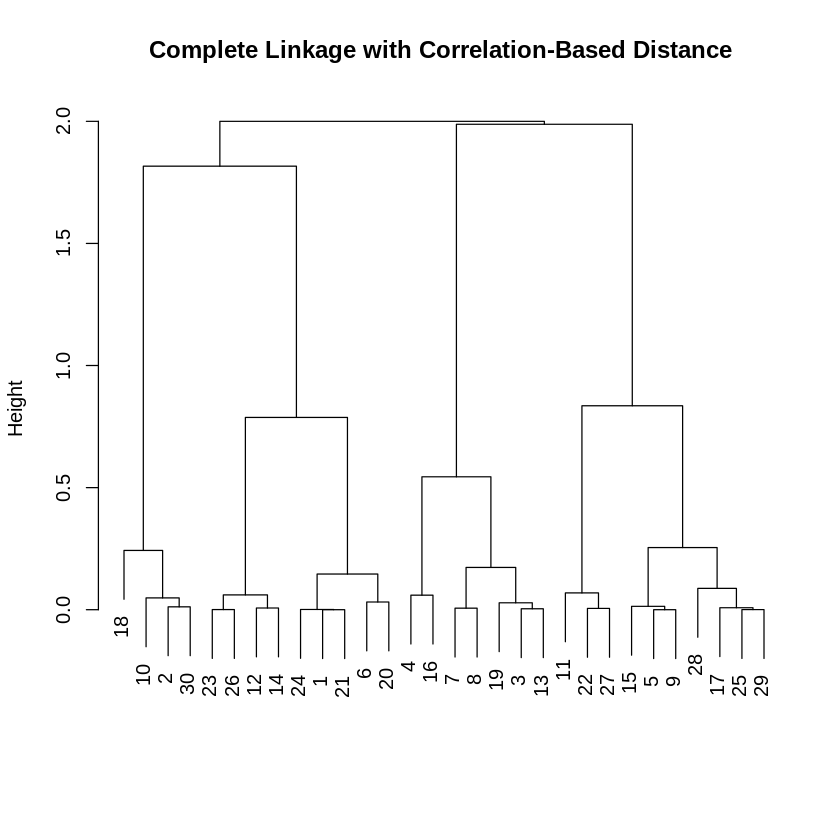

In [11]:
x = matrix(rnorm(30 * 3), ncol = 3)  # generate a 3-D normal data set
dd = as.dist(1 - cor(t(x)))
plot(hclust(dd, method = "complete"), main = "Complete Linkage with Correlation-Based Distance ", 
         xlab = "", sub = "")

--- 
<span style="color:#1576b2; font-size:20px; font-weight:700;"> Divisive Clustering

The most common divisive clustering technique is the DIANA (DIvisive ANAlysis Clustering) method.

In [12]:
#install.packages("cluster",repo="https://cran.mtu.edu/")
library(cluster)

In [13]:
help(diana)

Merge:
      [,1] [,2]
 [1,]  -22  -27
 [2,]  -12  -26
 [3,]  -20  -21
 [4,]   -5  -28
 [5,]  -10  -30
 [6,]    3  -24
 [7,]   -9  -29
 [8,]   -8    2
 [9,]  -13  -16
[10,]  -17    1
[11,]   -1   -2
[12,]   -7  -23
[13,]   -3   -4
[14,]    4  -15
[15,]    7   10
[16,]   -6    5
[17,]  -14    6
[18,]    9  -19
[19,]  -11  -25
[20,]    8   18
[21,]   14  -18
[22,]   11   12
[23,]   13   15
[24,]   22   20
[25,]   24   19
[26,]   23   21
[27,]   16   17
[28,]   25   26
[29,]   28   27
Order of objects:
 [1]  1  2  7 23  8 12 26 13 16 19 11 25  3  4  9 29 17 22 27  5 28 15 18  6 10
[26] 30 14 20 21 24
Height:
 [1] 0.9109991 2.1739940 1.0989901 2.7663109 0.8551993 0.3800085 1.6038123
 [8] 0.8921198 1.5596849 3.2705856 1.5843421 4.4215905 1.1532988 2.2842522
[15] 0.8171029 1.3563386 0.8989651 0.3175517 3.3532580 0.6274327 1.3254379
[22] 1.6107263 4.6127903 1.5217636 0.6706920 3.4309067 1.5500567 0.5926536
[29] 0.8039391
Divisive coefficient:
[1] 0.796102

Available components:
[1] "order"  "

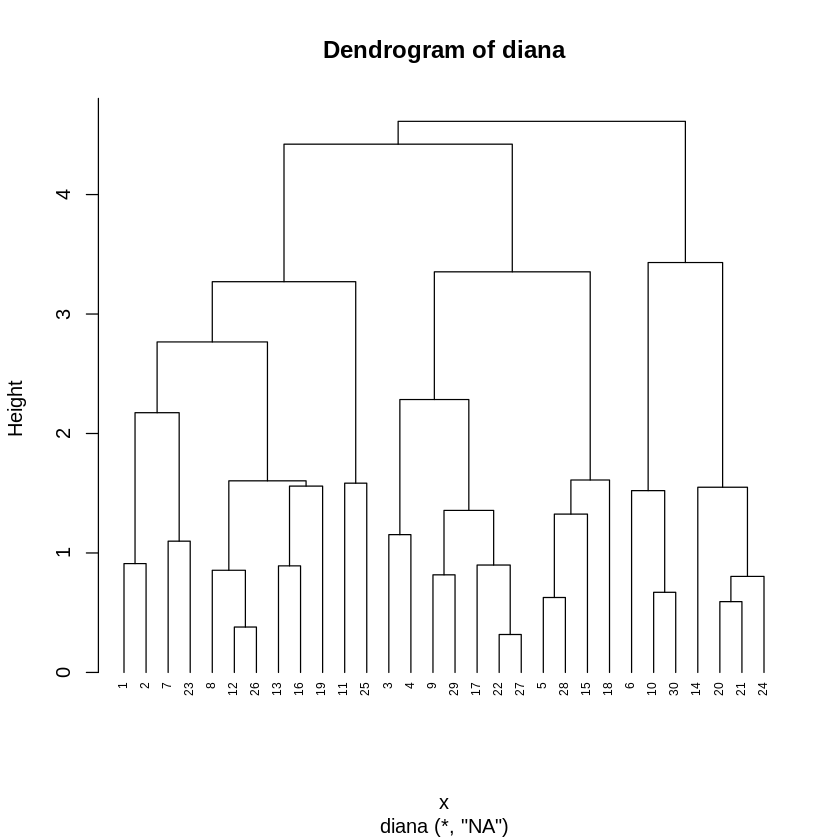

In [14]:
# Compute diana()
# x : could be matrix or data frame, or dissimilarity matrix or object.
# metric: character string specifying the metric to be used for calculating dissimilarities between observations.
# The currently available options are "euclidean" and "manhattan"

res_diana <- diana(x, metric = "euclidean", stand = FALSE)
print(res_diana)
# Plot the tree
pltree(res_diana, cex = 0.6, hang = -1, main = "Dendrogram of diana")

We can then analyze the dendogram and make the cuts as done previously.

In [15]:
## Cut into 2 groups:
diana2 <- cutree(as.hclust(res_diana), k = 2)

table(diana2) # 8 and 42 group members

rownames(x)[diana2 == 1]

diana2
 1  2 
23  7 

NULL

In [16]:
# Divise coefficient; amount of clustering structure found
res_diana$dc

[1] 0.796102

# Save your notebook!